In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

In [37]:
import data_clean as data_clean
import importlib
importlib.reload(data_clean)

<module 'data_clean' from '/home-nfs2/local/VANDERBILT/samirj/3rdyearproj/lgdata/data_clean.py'>

In [38]:
df = pd.read_csv('/home/local/VANDERBILT/samirj/3rdyearproj/lgdata/COMBINED_FILTERED_QA_FSWM_CNstar.csv')

/tmp/ipykernel_36340/3086834213.py:1: DtypeWarning: Columns (2,2098,2099,2100,2107,2108,2109,2110,2126,2127) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/local/VANDERBILT/samirj/3rdyearproj/lgdata/COMBINED_FILTERED_QA_FSWM_CNstar.csv')


In [39]:
for i in df.columns:
    print(i)

ID
subject
session
dataset
diagnosis
diagnosis_change
age
sex
scan
scanner
AF_left-ad-mean
AF_left-ad-std
AF_left-avg_length
AF_left-curl
AF_left-diameter
AF_left-elongation
AF_left-end_surface_area_head
AF_left-end_surface_area_tail
AF_left-fa-mean
AF_left-fa-std
AF_left-fractal_dimension
AF_left-irregularity
AF_left-irregularity_of_end_surface_head
AF_left-irregularity_of_end_surface_tail
AF_left-max_length
AF_left-md-mean
AF_left-md-std
AF_left-mean_curvature
AF_left-min_length
AF_left-radius_head
AF_left-radius_tail
AF_left-rd-mean
AF_left-rd-std
AF_left-span
AF_left-std_length
AF_left-streamlines_count
AF_left-surface_area
AF_left-volume
AF_left-volume_endpoints
AF_right-ad-mean
AF_right-ad-std
AF_right-avg_length
AF_right-curl
AF_right-diameter
AF_right-elongation
AF_right-end_surface_area_head
AF_right-end_surface_area_tail
AF_right-fa-mean
AF_right-fa-std
AF_right-fractal_dimension
AF_right-irregularity
AF_right-irregularity_of_end_surface_head
AF_right-irregularity_of_end_surf

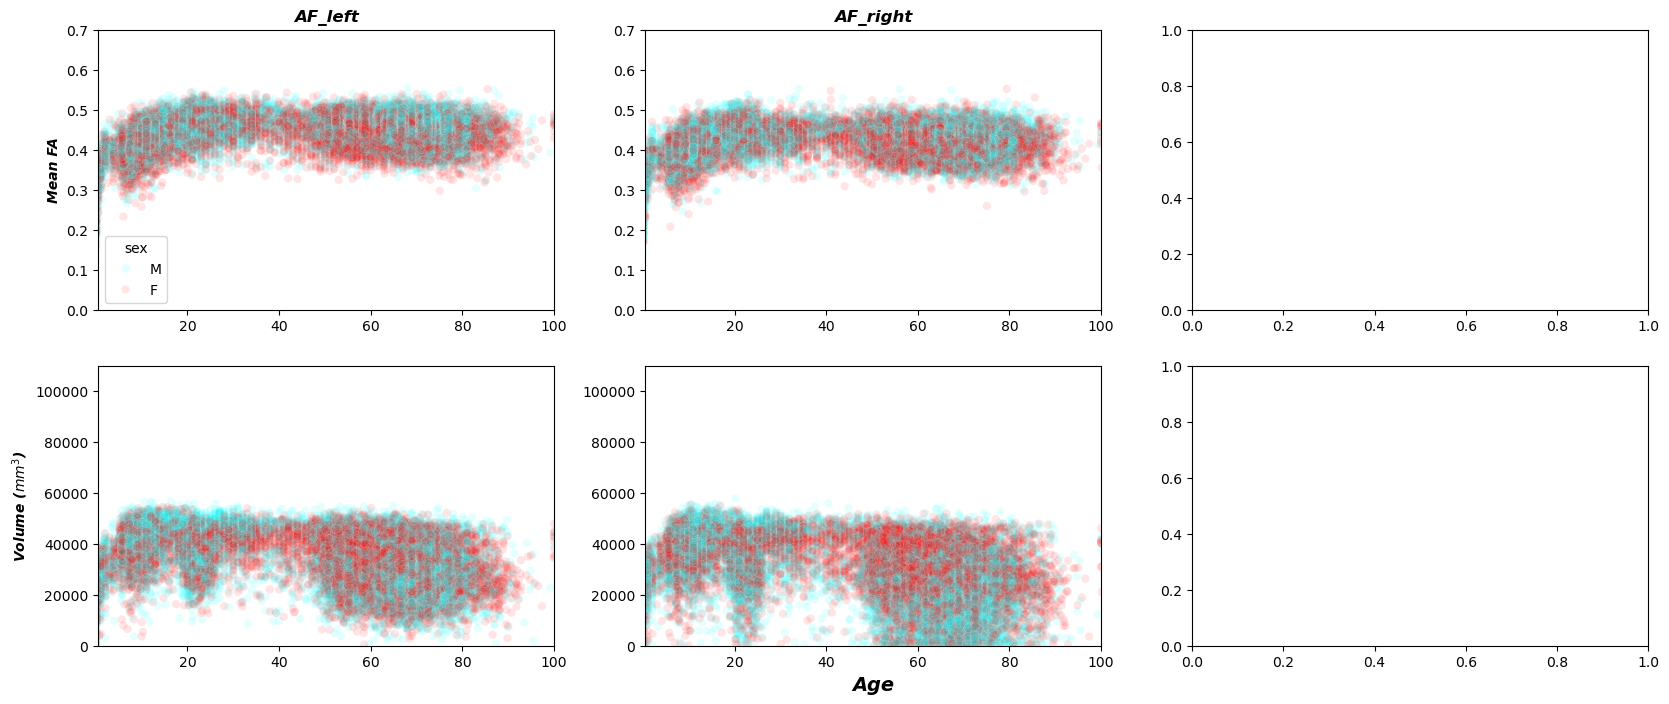

In [40]:
f,ax = plt.subplots(2,3,figsize=(20,8))
tracts = ['AF_left', 'AF_right']
measures = ['fa-mean', 'volume']
for i, tract in enumerate(tracts):
    for j, measure in enumerate(measures):
        #get the rows of the dataframe that matter
        metric = f'{tract}-{measure}'

        #now, do the data cleaning
        df_tract, dep_var = data_clean.prep_dataframe(df, tract=tract, metric=measure, threshold=1999, longitudinal=False)
        df_tract['sex'] = df_tract['sex'].map({0:"F", 1:'M'})

        #plot the metric as a function of age with a scatterplot
        sns.scatterplot(x='age', y=dep_var, data=df_tract, hue='sex', palette={"M": "cyan", "F": "red"}, hue_order=["M", "F"], ax=ax[j,i], alpha=0.1)
        #remove the subplot title
        ax[j,i].set_title('')
        ax[j,i].set_xlabel('')
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlim(0.5, 100)

        #ax[j,i].axhline(y=0, color='black', linestyle='--')
        if j==0:
            ax[j,i].set_title(tract, fontweight='bold', fontstyle='italic')
        if i==0:
            d = {'fa-mean': 'Mean FA', 'volume': r'Volume ($mm^{3}$)'}
            ax[j,i].set_ylabel(d[measure], fontweight='bold', fontstyle='italic')
        if i ==1 and j ==1:
            ax[j,i].set_xlabel('Age', fontsize=14, fontweight='bold', fontstyle='italic')
        #set the scale
        if j == 0:
            ax[j,i].set_ylim([0.0, 0.7])
        if j == 1:
            ax[j,i].set_ylim([0, 110000])
            
        #remove the legends for all but the first subplot
        if i != 0 or j != 0:
            ax[j,i].get_legend().remove()

In [41]:
# To get the tracts
tracts = [('AF_left','AF_right'),
('ATR_left','ATR_right'),
('CG_left','CG_right'), 
('CST_left','CST_right'), 
('MLF_left','MLF_right'),
('FPT_left','FPT_right' ),
('FX_left','FX_right'),
('ICP_left', 'ICP_right' ),    
('IFO_left','IFO_right'),
('ILF_left','ILF_right'), 
('OR_left','OR_right'),
('POPT_left','POPT_right' ),
('SCP_left','SCP_right' ),
('SLF_I_left','SLF_I_right' ),
('SLF_II_left','SLF_II_right'),
('SLF_III_left','SLF_III_right' ),
('STR_left','STR_right' ),
('UF_left','UF_right' ),
('T_PREF_left','T_PREF_right' ),
('T_PREM_left','T_PREM_right' ),
('T_PREC_left','T_PREC_right' ),
('T_POSTC_left','T_POSTC_right'), 
('T_PAR_left','T_PAR_right' ),
('T_OCC_left','T_OCC_right' ),
('ST_FO_left','ST_FO_right' ),
('ST_PREF_left','ST_PREF_right' ),
('ST_PREM_left','ST_PREM_right' ),
('ST_PREC_left','ST_PREC_right' ),
('ST_POSTC_left','ST_POSTC_right'),
('ST_PAR_left','ST_PAR_right' ),
('ST_OCC_left','ST_OCC_right')]

In [42]:
# To get the measures
for i in df.columns:
    if 'right' in i:
        print("'"+i.split('-')[1]+"',")

'ad',
'ad',
'avg_length',
'curl',
'diameter',
'elongation',
'end_surface_area_head',
'end_surface_area_tail',
'fa',
'fa',
'fractal_dimension',
'irregularity',
'irregularity_of_end_surface_head',
'irregularity_of_end_surface_tail',
'max_length',
'md',
'md',
'mean_curvature',
'min_length',
'radius_head',
'radius_tail',
'rd',
'rd',
'span',
'std_length',
'streamlines_count',
'surface_area',
'volume',
'volume_endpoints',
'ad',
'ad',
'avg_length',
'curl',
'diameter',
'elongation',
'end_surface_area_head',
'end_surface_area_tail',
'fa',
'fa',
'fractal_dimension',
'irregularity',
'irregularity_of_end_surface_head',
'irregularity_of_end_surface_tail',
'max_length',
'md',
'md',
'mean_curvature',
'min_length',
'radius_head',
'radius_tail',
'rd',
'rd',
'span',
'std_length',
'streamlines_count',
'surface_area',
'volume',
'volume_endpoints',
'ad',
'ad',
'avg_length',
'curl',
'diameter',
'elongation',
'end_surface_area_head',
'end_surface_area_tail',
'fa',
'fa',
'fractal_dimension',
'irregularity',
'

In [43]:
measures = ['ad-mean',
'ad-std',
'avg_length',
'curl',
'diameter',
'elongation',
'end_surface_area_head',
'end_surface_area_tail',
'fa-mean',
'fa-std',
'fractal_dimension',
'irregularity',
'irregularity_of_end_surface_head',
'irregularity_of_end_surface_tail',
'max_length',
'md-mean',
'md-std',
'mean_curvature',
'min_length',
'radius_head',
'radius_tail',
'rd-mean',
'rd-std',
'span',
'std_length',
'streamlines_count',
'surface_area',
'volume',
'volume_endpoints']

In [44]:
for i in df.columns:
   print(i)

ID
subject
session
dataset
diagnosis
diagnosis_change
age
sex
scan
scanner
AF_left-ad-mean
AF_left-ad-std
AF_left-avg_length
AF_left-curl
AF_left-diameter
AF_left-elongation
AF_left-end_surface_area_head
AF_left-end_surface_area_tail
AF_left-fa-mean
AF_left-fa-std
AF_left-fractal_dimension
AF_left-irregularity
AF_left-irregularity_of_end_surface_head
AF_left-irregularity_of_end_surface_tail
AF_left-max_length
AF_left-md-mean
AF_left-md-std
AF_left-mean_curvature
AF_left-min_length
AF_left-radius_head
AF_left-radius_tail
AF_left-rd-mean
AF_left-rd-std
AF_left-span
AF_left-std_length
AF_left-streamlines_count
AF_left-surface_area
AF_left-volume
AF_left-volume_endpoints
AF_right-ad-mean
AF_right-ad-std
AF_right-avg_length
AF_right-curl
AF_right-diameter
AF_right-elongation
AF_right-end_surface_area_head
AF_right-end_surface_area_tail
AF_right-fa-mean
AF_right-fa-std
AF_right-fractal_dimension
AF_right-irregularity
AF_right-irregularity_of_end_surface_head
AF_right-irregularity_of_end_surf

In [45]:
tract = 'AF_right'.split('_right')[0]

In [46]:
# tracts = [('AF_right', 'AF_left'), ('ATR_right', 'ATR_left'), ('CST_right', 'CST_left'), ('FPT_right', 'FPT_left')]
# measures = ['md-mean', 'ad-mean', 'volume', 'avg_length']
# columns_needed = ['ID','subject','session','dataset','diagnosis','diagnosis_change','age','sex','scan','scanner']
# new_df = df[columns_needed].copy()
# new_columns = pd.DataFrame(index=df.index)
for i, (tract_left, tract_right) in enumerate(tracts):
    for j, measure in enumerate(measures):
        # Assuming 'df' is already loaded with your data
        # Calculate the Asymmetry Index (AI)
        
        right = f'{tract_right}-{measure}'
        left = f'{tract_left}-{measure}'
        tract = tract_right.split('_right')[0]
        key_name = f'{tract}-{measure}-ai'
        left_data = df[left].fillna(0)
        right_data = df[right].fillna(0)
        df[key_name] = (left_data - right_data) / (left_data + right_data)
# new_df = pd.concat([df, new_columns], axis=1)

/tmp/ipykernel_36340/4099383426.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[key_name] = (left_data - right_data) / (left_data + right_data)
/tmp/ipykernel_36340/4099383426.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[key_name] = (left_data - right_data) / (left_data + right_data)
/tmp/ipykernel_36340/4099383426.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using p

In [47]:
df.to_csv('/home/local/VANDERBILT/samirj/3rdyearproj/lgdata/ALLUPDATED_COMBINED_FILTERED_QA_FSWM_CNstar.csv', index=False)

Plot Asymmentry

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
import data_clean as data_clean
import importlib
importlib.reload(data_clean)

<module 'data_clean' from '/home-nfs2/local/VANDERBILT/samirj/3rdyearproj/lgdata/data_clean.py'>

In [388]:
df_ai = pd.read_csv('/home/local/VANDERBILT/samirj/3rdyearproj/lgdata/ALLUPDATED_COMBINED_FILTERED_QA_FSWM_CNstar.csv')

/tmp/ipykernel_36340/2781092973.py:1: DtypeWarning: Columns (2,2098,2099,2100,2107,2108,2109,2110,2126,2127) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ai = pd.read_csv('/home/local/VANDERBILT/samirj/3rdyearproj/lgdata/ALLUPDATED_COMBINED_FILTERED_QA_FSWM_CNstar.csv')


In [389]:
'''
f,ax = plt.subplots(4,4,figsize=(20,8))
tracts = ['AF', 'ATR', 'FPT', 'CST']
measures = ['fa-mean-ai', 'rd-mean-ai', 'volume-ai', 'avg_length-ai']
for i, tract in enumerate(tracts):
    for j, measure in enumerate(measures):
        #get the rows of the dataframe that matter
        metric = f'{tract}-{measure}'
        #now, do the data cleaning
        df_ai['sex'] = df_ai['sex'].map({0:"F", 1:'M'})
        df_tract, dep_var = data_clean.prep_dataframe(df_ai, tract=tract, metric=measure, threshold=1999, longitudinal=False)

        #plot the metric as a function of age with a scatterplot
        sns.scatterplot(x='age', y=dep_var, data=df_tract, hue='sex', palette={"M": "blue", "F": "red"}, hue_order=["M", "F"], ax=ax[j,i], alpha=0.1)
        #remove the subplot title
        ax[j,i].set_title('')
        ax[j,i].set_xlabel('')
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlim(0.5, 90)
        ax[j,i].axhline(y=0, color='black', linestyle='--')
        if j==0:
            ax[j,i].set_title(tract, fontweight='bold', fontstyle='italic')
        if i==0:
            d = {'fa-mean-ai': 'AI Mean FA', 'rd-mean-ai': 'AI Mean RD', 'volume-ai': r'AI Volume ($mm^{3}$)', 'avg_length-ai': r'AI Length ($mm$)'}
            ax[j,i].set_ylabel(d[measure], fontweight='bold', fontstyle='italic')
        if i ==0 and j ==0:
            ax[j,i].set_xlabel('Age', fontsize=14, fontweight='bold', fontstyle='italic')
            ax[j,i].legend(fontsize='8')

        #set the scale
        if j == 0 or j ==1 or j == 2 or j == 3 :
            ax[j,i].set_ylim([-0.5, 0.5])
        if j == 1:
            ax[j,i].set_ylim([-0.5, 0.5])
            
        # remove the legends for all but the first subplot
        if i != 0 or j != 0:
            ax[j,i].get_legend().remove()
'''

'\nf,ax = plt.subplots(4,4,figsize=(20,8))\ntracts = [\'AF\', \'ATR\', \'FPT\', \'CST\']\nmeasures = [\'fa-mean-ai\', \'rd-mean-ai\', \'volume-ai\', \'avg_length-ai\']\nfor i, tract in enumerate(tracts):\n    for j, measure in enumerate(measures):\n        #get the rows of the dataframe that matter\n        metric = f\'{tract}-{measure}\'\n        #now, do the data cleaning\n        df_ai[\'sex\'] = df_ai[\'sex\'].map({0:"F", 1:\'M\'})\n        df_tract, dep_var = data_clean.prep_dataframe(df_ai, tract=tract, metric=measure, threshold=1999, longitudinal=False)\n\n        #plot the metric as a function of age with a scatterplot\n        sns.scatterplot(x=\'age\', y=dep_var, data=df_tract, hue=\'sex\', palette={"M": "blue", "F": "red"}, hue_order=["M", "F"], ax=ax[j,i], alpha=0.1)\n        #remove the subplot title\n        ax[j,i].set_title(\'\')\n        ax[j,i].set_xlabel(\'\')\n        ax[j,i].set_ylabel(\'\')\n        ax[j,i].set_xlim(0.5, 90)\n        ax[j,i].axhline(y=0, color=\'b

In [390]:
# To get the tracts
tracts = ['AF','ATR','CG','CST','MLF','FPT','FX','ICP','IFO','ILF','OR','POPT','SCP','SLF_I','SLF_II','SLF_III','STR','UF','T_PREF','T_PREM','T_PREC','T_POSTC','T_PAR','T_OCC','ST_FO','ST_PREF','ST_PREM','ST_PREC','ST_POSTC','ST_PAR','ST_OCC']

In [391]:
Association = ['AF','CG','MLF','IFO','ILF','SLF_I','SLF_II','SLF_III','UF']
Thalamic = ['T_PREF','T_PREM','T_PREC','T_POSTC','T_PAR','T_OCC']
Striatal = ['ST_FO','ST_PREF','ST_PREM','ST_PREC','ST_POSTC','ST_PAR','ST_OCC']
Projection = ['CST','FPT','ICP', 'OR','POPT','SCP']
rest = ['ATR', 'STR', 'FX']


In [392]:
'''
measures = ['ad-mean-ai',
'ad-std-ai',
'avg_length-ai',
'curl-ai',
'diameter-ai',
'elongation-ai',
'end_surface_area_head-ai',
'end_surface_area_tail-ai',
'fa-mean-ai',
'fa-std-ai',
'fractal_dimension-ai',
'irregularity-ai',
'irregularity_of_end_surface_head-ai',
'irregularity_of_end_surface_tail-ai',
'max_length-ai',
'md-mean-ai',
'md-std-ai',
'mean_curvature-ai',
'min_length-ai',
'radius_head-ai',
'radius_tail-ai',
'rd-mean-ai',
'rd-std-ai',
'span-ai',
'std_length-ai',
'streamlines_count-ai',
'surface_area-ai',
'volume-ai',
'volume_endpoints-ai']
'''

measures = [
'ad-mean-ai',
'fa-mean-ai',
'md-mean-ai',
'rd-mean-ai',
'avg_length-ai',
'volume-ai'

]



In [393]:
import data_clean as data_clean
import importlib
importlib.reload(data_clean)

<module 'data_clean' from '/home-nfs2/local/VANDERBILT/samirj/3rdyearproj/lgdata/data_clean.py'>

In [397]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#New updated one

# Prepare an empty DataFrame for aggregated data
pathways = [Association, Thalamic, Striatal, Projection]
title = ['Association', 'Thalamic', 'Striatal', 'Projection']

age = 3
for k in range(len(pathways)):
    tracts = pathways[k]
    data_matrix = pd.DataFrame(index=measures, columns=tracts)

    # Fill the matrix with aggregated data
    for i, tract in enumerate(tracts):
        for j, measure in enumerate(measures):
            # You need to define how to get 'metric_value'
            # This example assumes you calculate some mean or relevant statistic
            print(tract)
            print(measure)
            df_tract, dep_var = data_clean.prep_dataframe(df_ai, tract=tract, metric=measure, threshold=1999, longitudinal=False)
            df_tract = df_tract[df_tract['age'] == age] 
            metric = f'{tract}-{measure}'
            metric_value = df_tract[dep_var].fillna(0).mean() # Example: calculating mean
            data_matrix.loc[measure, tract] = metric_value
    
    data_matrix.to_csv(f"{title[k]}_{age}_ai.csv")
    data_matrix.index = data_matrix.index.str.replace('filename ="-ai', '')
    norm = mcolors.TwoSlopeNorm(vmin=data_matrix.min().min(), vcenter=0, vmax=data_matrix.max().max())

AF
ad-mean-ai


ValueError: cannot reindex on an axis with duplicate labels

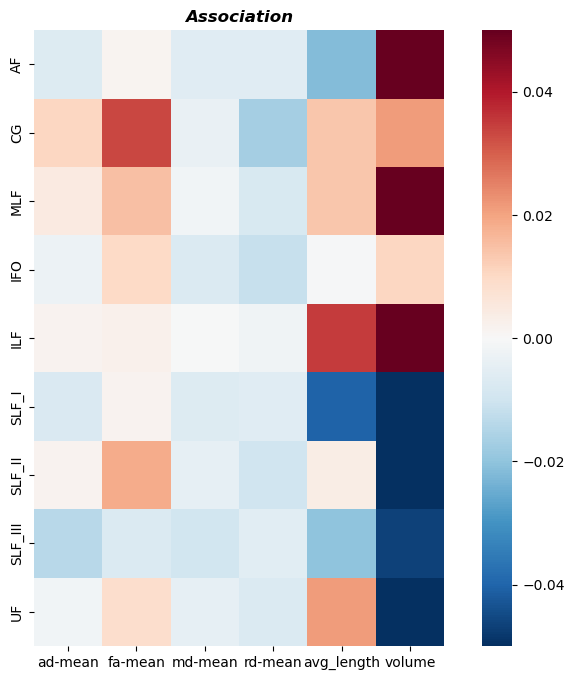

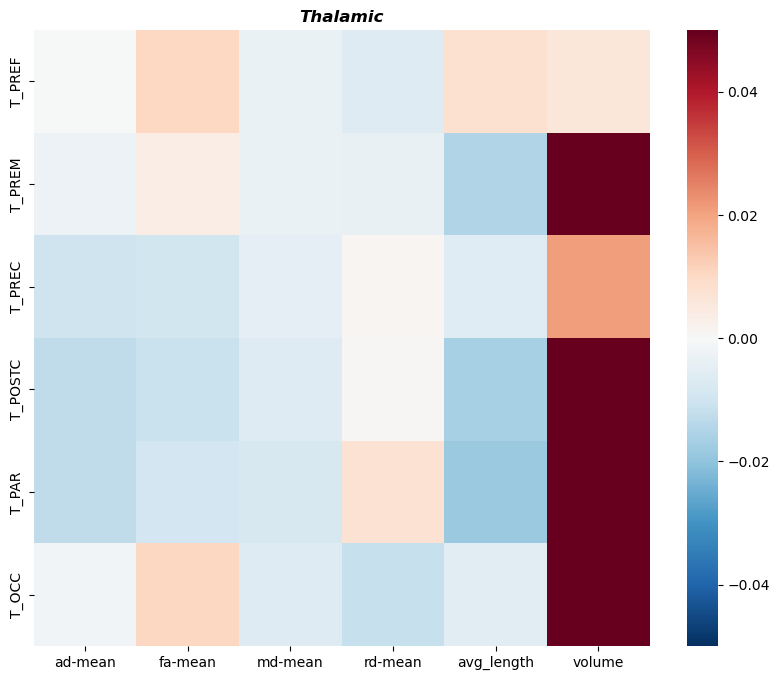

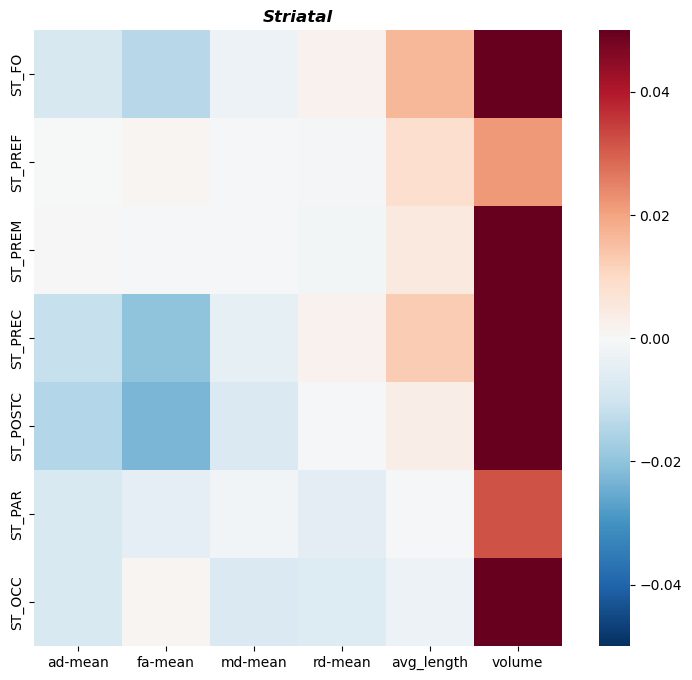

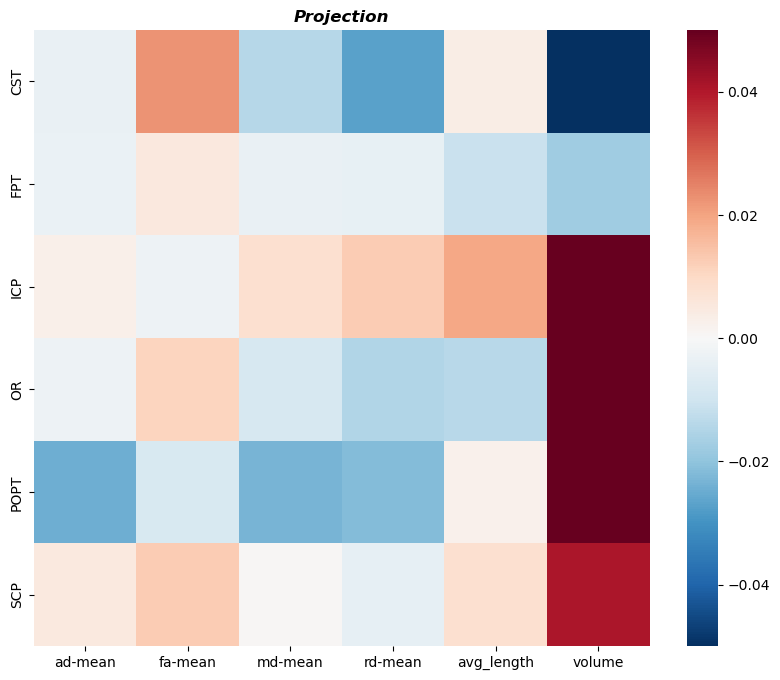

In [396]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

title = ['Association', 'Thalamic', 'Striatal', 'Projection']

age = 3

for k in range(len(title)):
    # Read the CSV file into a DataFrame
    data_matrix = pd.read_csv(f"{title[k]}_{age}_ai.csv", index_col=0)
    data_matrix.index = data_matrix.index.str.replace('-ai', '')
    data_matrix = data_matrix.T

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(
        data_matrix.fillna(0),
        annot=False, 
        #fmt=".2f",
        cmap='RdBu_r',
        square=True,
        linewidths=0,
        cbar_kws={'fraction': 0.046, 'pad': 0.04},
        vmin = -0.05,
        vmax = 0.05
    )
    
    ax.set_aspect("equal") 

    # Title and labels can be customized as required
    plt.title(f'{title[k]}', fontweight='bold', fontstyle='italic')

    # Save the figure
    #plt.savefig(f"{title[k]}_age_{age}.png", bbox_inches='tight')

    plt.show()

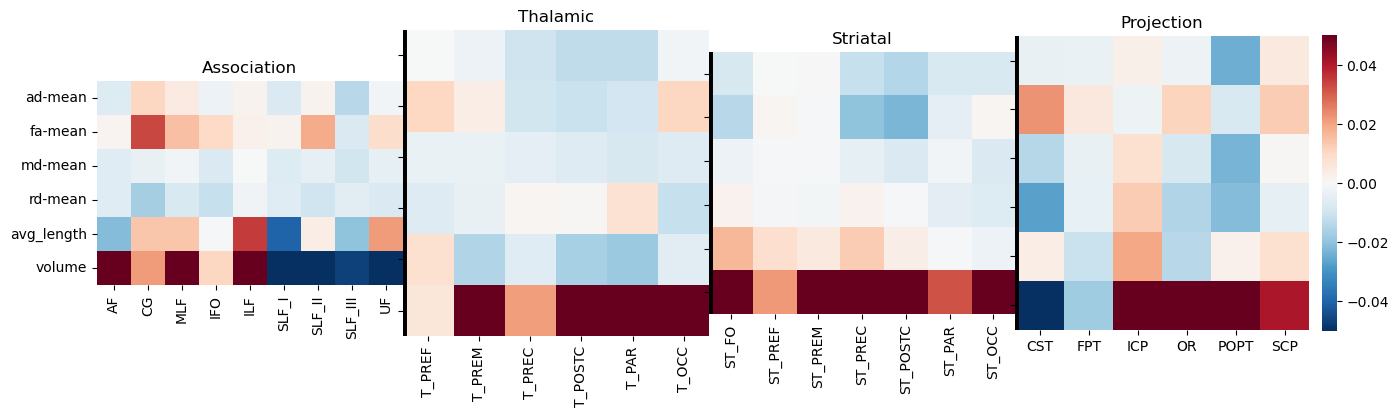

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

# Titles corresponding to each pathways group
title = ['Association', 'Thalamic', 'Striatal', 'Projection']
age = 3
linewidth_between_heatmaps = 5 

# Set up the figure and GridSpec, set wspace=0 for no space between subplots
fig = plt.figure(figsize=(16, 4))
column_widths = [1] * (len(title) - 1) + [1.05] 
gs = GridSpec(1, len(title), figure=fig, wspace=0, width_ratios=column_widths)

# Create subplots for each heatmap
for k, t in enumerate(title):
    # Read the CSV file into a DataFrame
    data_matrix = pd.read_csv(f"{t}_{age}_ai.csv", index_col=0)
    data_matrix.index = data_matrix.index.str.replace('-ai', '')
    # Create the subplot with no space between them
    ax = fig.add_subplot(gs[0, k])
    
    # Create the heatmap
    plt.figure(figsize=(12, 8))

    ax = sns.heatmap(
        data_matrix.fillna(0),fontweight='bold', fontstyle='italic'
        ax=ax,  # Set current axis for the heatmap
        annot=False,
        fmt=".2f",
        cmap='RdBu_r',
        cbar=k == len(title)-1,  # Show colorbar only for last plot
        cbar_kws={'fraction': 0.046, 'pad': 0.04},
        linewidths=0.0,
        #square = True,
        vmin = -0.05,
        vmax = 0.05
    )

    ax.set_aspect("equal") 

    # Customize the subplot axes
    ax.set_title(t)
    if k != 0:
        # Remove y-axis labels and ticks for all but the first subplot
        ax.set_ylabel('', fontweight='bold', fontstyle='italic')
        ax.set_yticklabels([])
    
    # If not the first subplot, draw a line to the left of the subplot
    if k > 0:
        # Adding Line2D instance to draw thick line on the left of each subplot, except the first
        line = mlines.Line2D(
            [0, 0], [1, 0],
            transform=ax.transAxes,  # Transforms indicate that coordinates are axes fractions
            color='black',
            linewidth=linewidth_between_heatmaps
        )
        ax.add_line(line)

    
# Overall adjustments and save the figure
#plt.suptitle(f'Heatmaps of Pathways at Age {age}', y=1.02)
plt.tight_layout(rect=[0, 0, 0.9, 0.96])  # Adjust the layout to make room for the suptitle
plt.savefig(f"combined_heatmap_age_{age}.png", bbox_inches='tight')
plt.show()

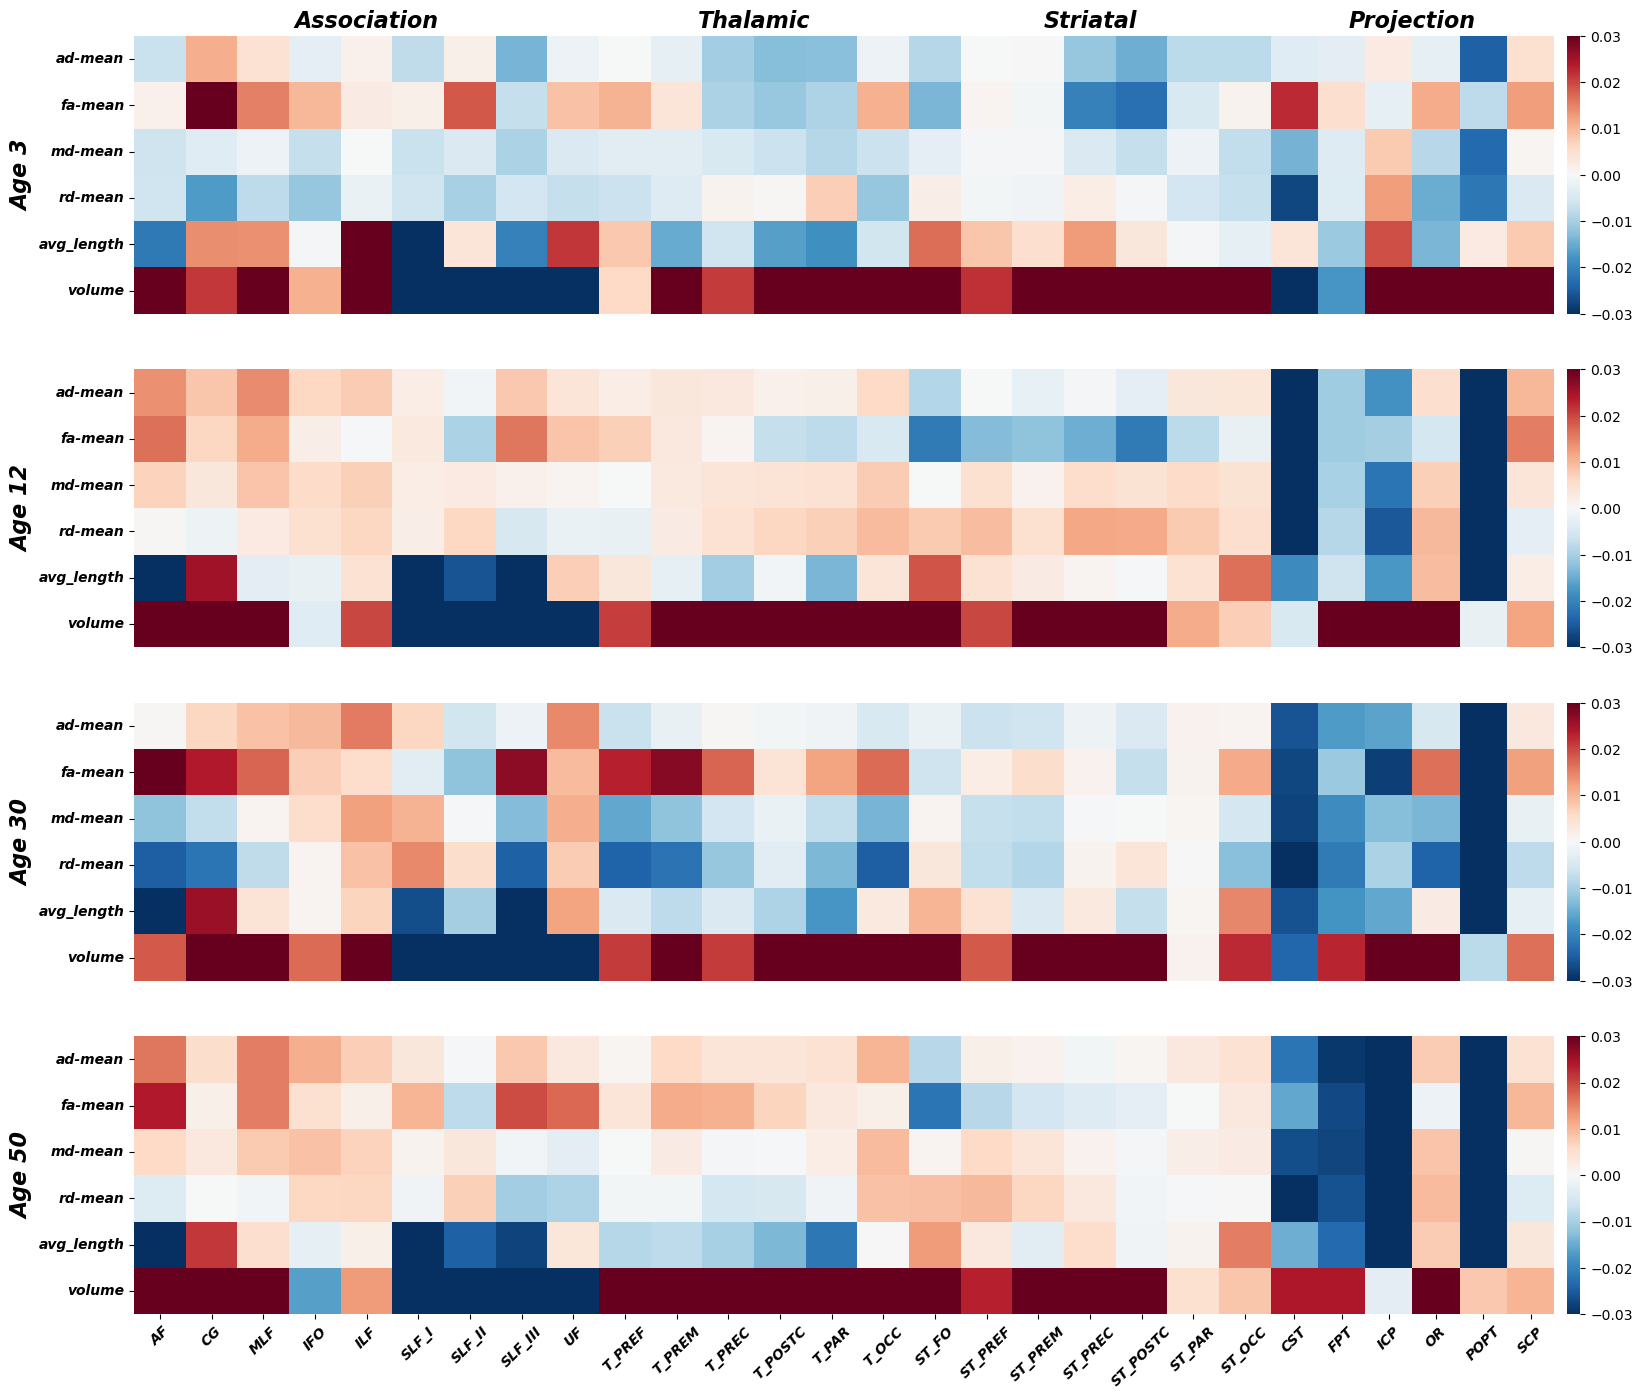

In [398]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

titles = ['Association', 'Thalamic', 'Striatal', 'Projection']
ages = [3, 12, 30, 50] 

horizontal_spacing = 0  
vertical_spacing = 0.2
linewidth_between_heatmaps = 5
individual_height = 4


width_ratios = []
for title in titles:
    data = pd.read_csv(f"{title}_{ages[0]}_ai.csv", index_col=0)
    width_ratios.append(data.shape[1])  # Use the number of columns as width ratio

min_ratios = min(width_ratios)
width_ratios = [ratio / min_ratios for ratio in width_ratios]
# Consider extra space for the colorbar in the last plot
width_ratios.append(0)  # Assuming the colorbar takes about 20% of the normalized width

# Initialize the figure with calculated total width and height
fig_width = sum(width_ratios) * individual_height  # Assume each unit width corresponds to the row height
fig_height = len(ages) * individual_height + (len(ages) - 1) * vertical_spacing
fig = plt.figure(figsize=(fig_width, fig_height))

# Create GridSpec with the calculated width_ratios and user-defined spacings
gs = GridSpec(nrows=len(ages), ncols=len(titles) +1,  # +1 for the colorbar
              width_ratios=width_ratios, wspace=horizontal_spacing, hspace=vertical_spacing)

# Function to compile and plot heatmap subplots
def plot_heatmap(row, col, age, title):
    # Set up the axes for the heatmap
    ax = fig.add_subplot(gs[row, col])
    # Read the CSV file into a DataFrame
    data_matrix = pd.read_csv(f"{title}_{age}_ai.csv", index_col=0)
    data_matrix.index = data_matrix.index.str.replace('-ai', '')
    
    # Create the heatmap
    sns.heatmap(
        data_matrix.fillna(0),
        ax=ax,
        annot=False,
        cmap='RdBu_r',
        cbar=col == len(titles) - 1,  # Show colorbar only for the last heatmap
        cbar_kws={'fraction': 0.046, 'pad': 0.04} if col == len(titles) - 1 else None,
        #square=True,
        vmin=-0.03,
        vmax=0.03
    )
    # Additional formatting for y-axis labels and titles
    if col == 0:
        ax.set_yticklabels(data_matrix.index, rotation=0, fontweight='bold', fontstyle='italic')
    else:
        ax.set_yticklabels([])
        ax.set_yticks([])  # Remove y-axis tick labels for non-first columns
    
    if row == len(ages) - 1:
        ax.set_xticklabels(data_matrix.columns, rotation=45, ha="center", fontweight='bold', fontstyle='italic')
    else:
        ax.set_xticklabels([])
        ax.set_xticks([])  # Remove x-axis tick labels for non-last rows
    
    if col == 0:
        ax.set_ylabel(f'Age {age}', fontsize=16, fontweight='bold', fontstyle='italic')
    if row == 0:
        ax.set_title(title, fontsize=16, fontweight='bold', fontstyle='italic')
 # If not the first subplot, draw a line to the left of the subplot
    if k > 0:
        # Adding Line2D instance to draw thick line on the left of each subplot, except the first
        line = mlines.Line2D(
            [0, 0], [1, 0],
            transform=ax.transAxes,  # Transforms indicate that coordinates are axes fractions
            color='black',
            linewidth=linewidth_between_heatmaps
        )
        ax.add_line(line)
# Iterate and plot each heatmap
for age_index, age in enumerate(ages):
    for title_index, title in enumerate(titles):
        plot_heatmap(age_index, title_index, age, title)

# Now adjust the figure layout and aspect ratios
#plt.tight_layout()
plt.savefig(f"combined_heatmap_ages_{min(ages)}_{max(ages)}.png")
plt.show()

In [406]:
#creating a dictionary so i can change x axes
values_per_age = {age: {} for age in ages} #this is keeping open values
for title in titles:
    for age in ages:
        df = pd.read_csv(f"{title}_{age}_ai.csv", index_col = 0)
        rows = df.loc[measures]
        if rows is not None:
            values_per_age[age][title] = rows
print(values_per_age)

{3: {'Association':                      AF        CG       MLF       IFO       ILF     SLF_I  \
ad-mean-ai    -0.006717  0.010832  0.004544 -0.002883  0.001640 -0.007533   
fa-mean-ai     0.001547  0.033424  0.015210  0.009970  0.002401  0.001851   
md-mean-ai    -0.006215 -0.003722 -0.001704 -0.007192 -0.000180 -0.006771   
rd-mean-ai    -0.006089 -0.016923 -0.007888 -0.011519 -0.001986 -0.005997   
avg_length-ai -0.021527  0.013896  0.013760 -0.000486  0.034992 -0.040574   
volume-ai      0.075103  0.021177  0.060255  0.010671  0.072239 -0.063302   

                 SLF_II   SLF_III        UF  
ad-mean-ai     0.001792 -0.013942 -0.001810  
fa-mean-ai     0.018669 -0.007074  0.008736  
md-mean-ai    -0.004297 -0.009506 -0.004619  
rd-mean-ai    -0.009921 -0.005511 -0.007214  
avg_length-ai  0.003794 -0.020266  0.021365  
volume-ai     -0.140369 -0.046546 -0.088081  , 'Thalamic':                  T_PREF    T_PREM    T_PREC   T_POSTC     T_PAR     T_OCC
ad-mean-ai    -0.000231 -0.0027

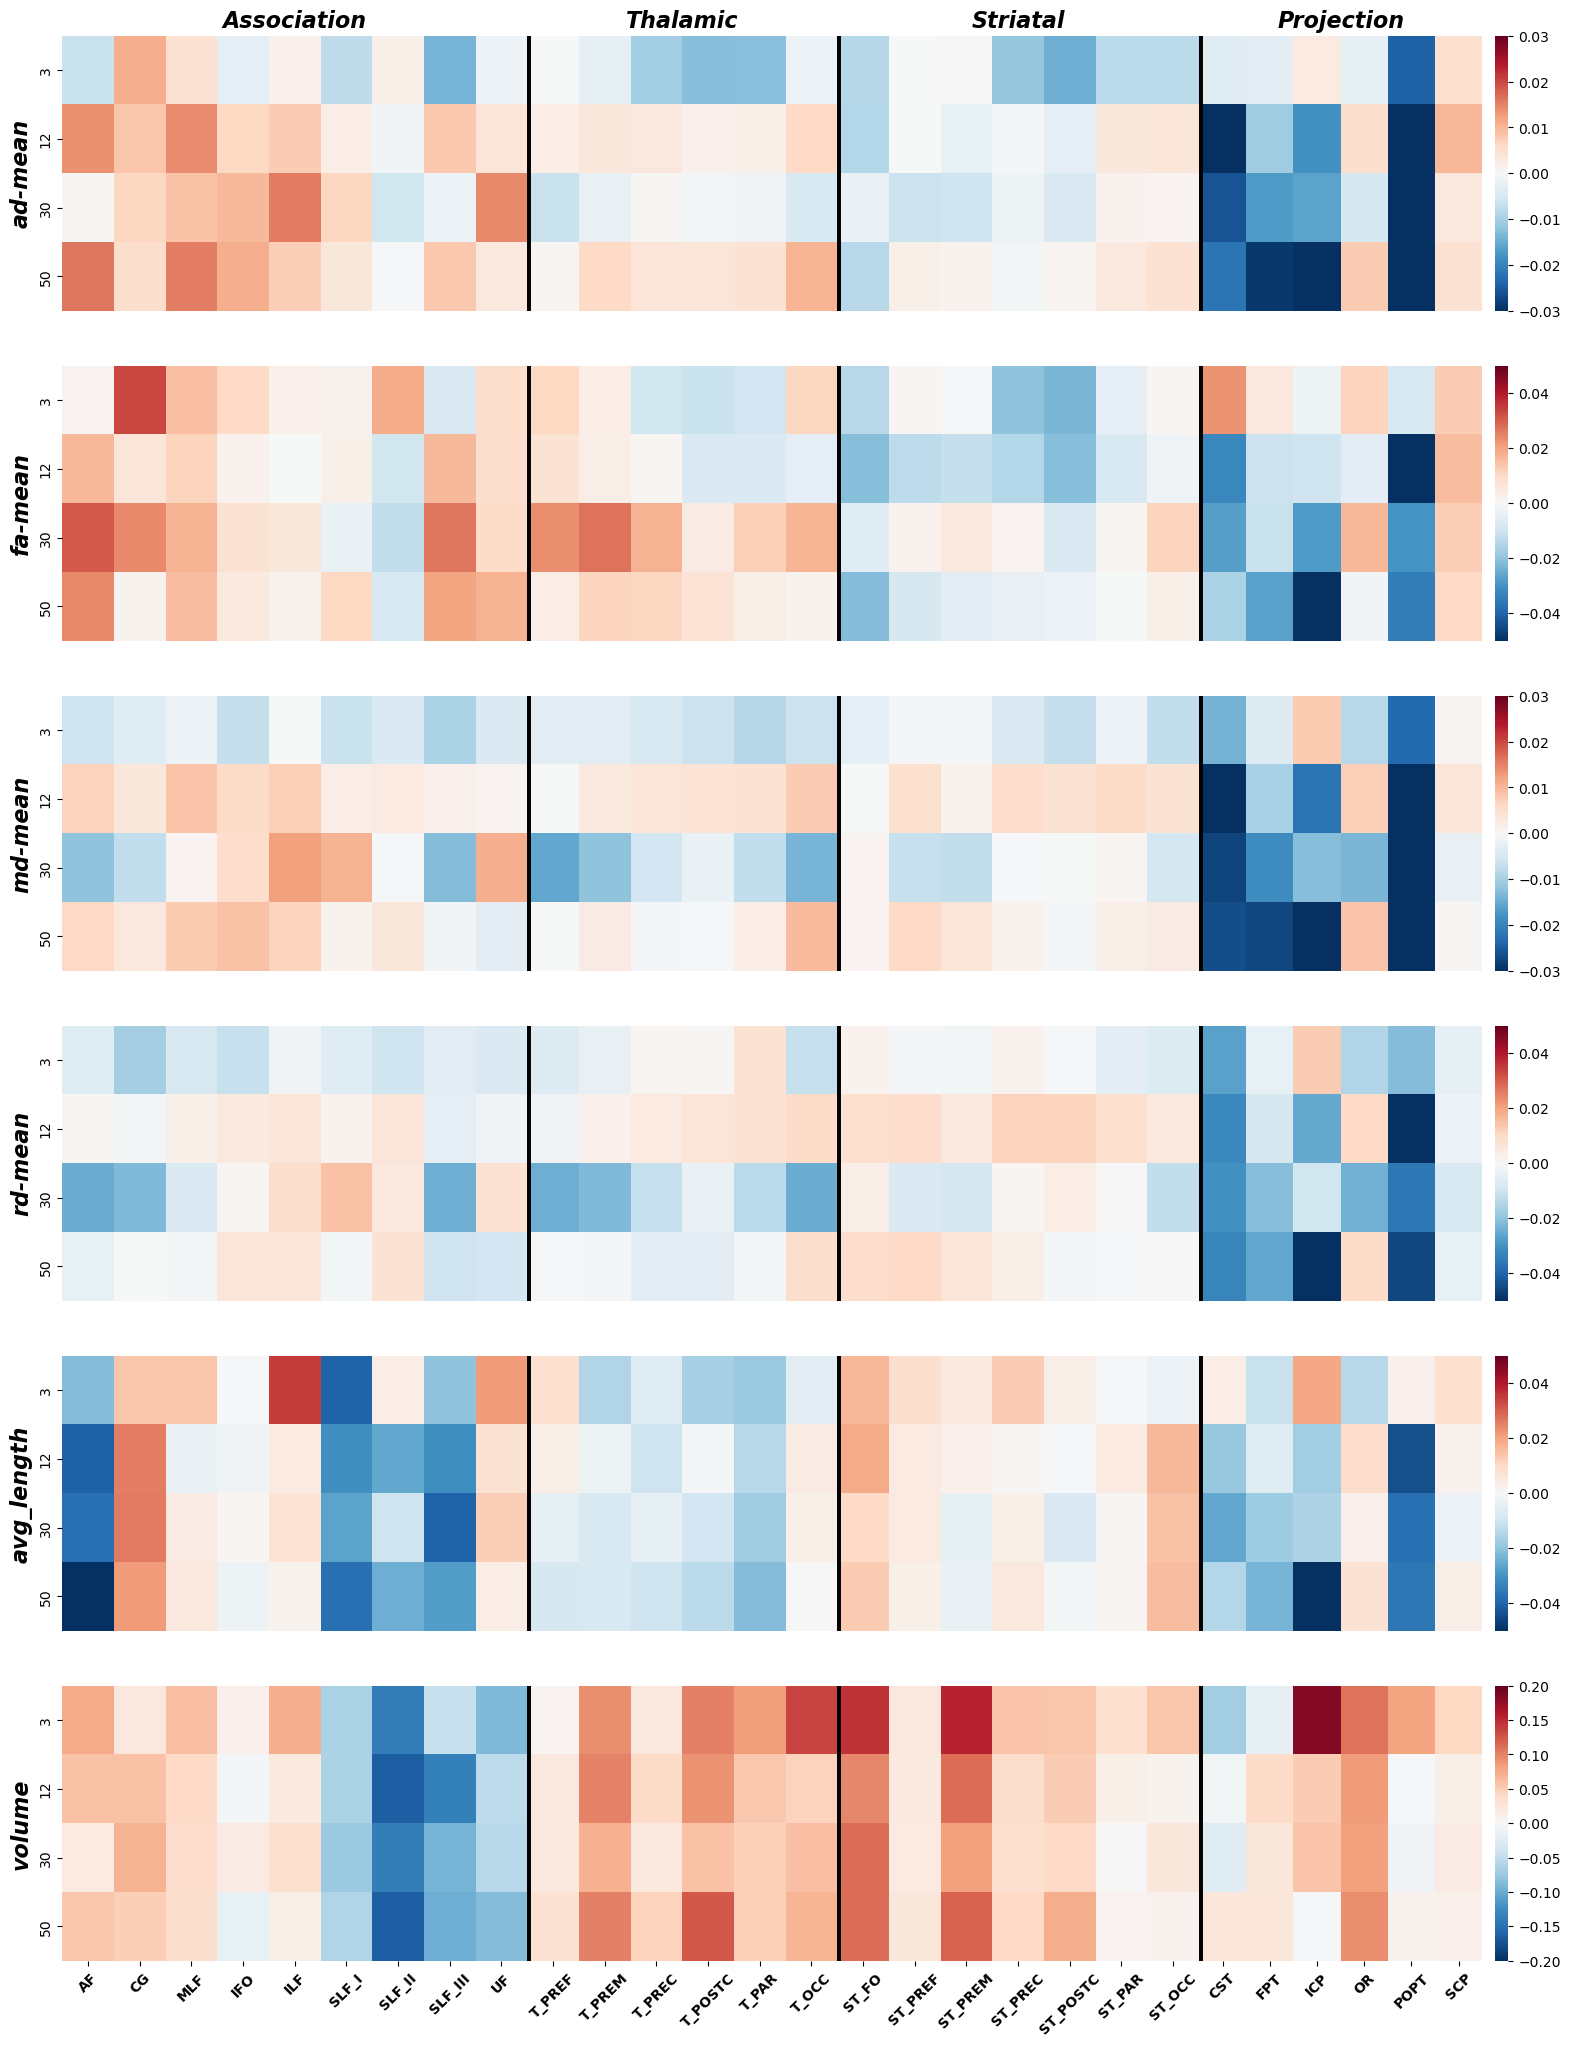

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

measures = [
    'ad-mean-ai',
    'fa-mean-ai',
    'md-mean-ai',
    'rd-mean-ai',
    'avg_length-ai',
    'volume-ai'
]
titles = ['Association', 'Thalamic', 'Striatal', 'Projection']
ages = [3, 12, 30, 50]

horizontal_spacing = 0  
vertical_spacing = 0.2
linewidth_between_heatmaps = 5  # Thickness of separation lines
individual_height = 4

width_ratios = []
for title in titles:
    sample_df = pd.read_csv(f"{title}_{ages[0]}_ai.csv", index_col=0)
    width_ratios.append(sample_df.shape[1])

min_width = min(width_ratios)
width_ratios = [w / min_width for w in width_ratios]
width_ratios.append(0)  # Extra space for colorbar

fig_width = sum(width_ratios) * individual_height  
fig_height = len(measures) * individual_height + (len(measures) - 1) * vertical_spacing

fig = plt.figure(figsize=(fig_width, fig_height))
gs = GridSpec(nrows=len(measures), ncols=len(titles) + 1, width_ratios=width_ratios, wspace=horizontal_spacing, hspace=vertical_spacing)

# Custom vmin and vmax for each measure
#############
vmin_vmax_dict = {
    "ad-mean-ai": (-0.03, 0.03),
    "fa-mean-ai": (-0.05, 0.05),
    "md-mean-ai": (-0.03, 0.03),
    "rd-mean-ai": (-0.05, 0.05),
    "avg_length-ai": (-0.05, 0.05),
    "volume-ai": (-0.2, 0.2)
}

def plot_heatmap(row, col, measure, title):
    ax = fig.add_subplot(gs[row, col])
    
    data_matrix = pd.DataFrame({age: values_per_age[age][title].loc[measure] for age in ages}).T
    track_labels = data_matrix.columns  # Set x-axis labels as tracks


    vmin, vmax = vmin_vmax_dict.get(measure, (-0.04, 0.04))

    ##
    sns.heatmap(
        data_matrix.fillna(0),
        ax=ax,
        annot=False,
        cmap='RdBu_r',
        vmin=vmin,
        vmax=vmax,
        cbar=col == len(titles) - 1,
        cbar_kws={'fraction': 0.046, 'pad': 0.04} if col == len(titles) - 1 else None
    )

    #
    clean_measure = measure.replace('-ai', '')

    #  y-axis labels (only for first column)
    if col == 0:
        ax.set_ylabel(clean_measure, fontsize=16, fontweight='bold', fontstyle='italic')
    else:
        ax.set_yticklabels([])
        ax.set_yticks([])

    #  x-axis labels only for last row
    if row == len(measures) - 1:
        ax.set_xticklabels(track_labels, rotation=45, ha="center", fontweight='bold')
    else:
        ax.set_xticklabels([])
        ax.set_xticks([])  # Remove x-axis tick labels for non-last rows

    #  titles for first row
    if row == 0:
        ax.set_title(title, fontsize=16, fontweight='bold', fontstyle='italic')

    # Draw vertical separator line between heatmaps
    if col > 0:
        line = mlines.Line2D(
            [0, 0], [1, 0],
            transform=ax.transAxes,  
            color='black',
            linewidth=linewidth_between_heatmaps
        )
        ax.add_line(line)

for measure_index, measure in enumerate(measures):
    for title_index, title in enumerate(titles):
        plot_heatmap(measure_index, title_index, measure, title)

plt.show()



In [8]:
df_tract

,dataset,age,sex,st_fo_ad_mean_ai,st_fo_ad_std_ai,st_fo_avg_length_ai,st_fo_curl_ai,st_fo_diameter_ai,st_fo_elongation_ai,st_fo_end_surface_area_head_ai,...,st_occ_radius_head_ai,st_occ_radius_tail_ai,st_occ_rd_mean_ai,st_occ_rd_std_ai,st_occ_span_ai,st_occ_std_length_ai,st_occ_streamlines_count_ai,st_occ_surface_area_ai,st_occ_volume_ai,st_occ_volume_endpoints_ai
21131,DLBS,50.0,0.0,-0.001649,0.065704,0.034056,0.043705,0.047530,-0.013495,0.147245,...,0.001846,0.057070,0.011345,0.073563,0.023567,0.048118,0.0,0.022462,0.008222,-0.009938
3147,DLBS,50.0,1.0,-0.012435,0.079275,-0.001047,0.053531,0.110814,-0.111848,0.189125,...,-0.066636,0.062724,0.020945,-0.036284,0.051974,0.054342,0.0,-0.145922,-0.149315,-0.104756
2792,DLBS,50.0,1.0,-0.013286,-0.014469,0.024899,0.025507,0.148320,-0.123879,0.285488,...,0.056728,0.216295,-0.020070,-0.051387,-0.000687,0.091171,0.0,0.093810,0.081530,0.046792
2984,DLBS,50.0,1.0,-0.011677,0.070495,-0.017014,0.023180,0.116547,-0.133297,0.114478,...,-0.005880,0.127529,0.010278,-0.019846,0.033229,-0.023050,0.0,-0.061920,0.016340,0.038523
21860,DLBS,50.0,0.0,-0.009703,0.152300,-0.013188,0.039415,0.109239,-0.122250,0.149822,...,0.046996,0.020175,0.006430,0.003318,0.050958,0.028446,0.0,0.124003,0.073609,0.011680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13084,VMAP_2.0,50.0,0.0,-0.014531,-0.022869,-0.036429,0.040376,0.061779,-0.097987,0.062629,...,-0.027107,0.025242,0.003488,-0.056378,0.001888,0.109036,0.0,0.007775,0.007801,0.003812
6783,VMAP_2.0,50.0,0.0,NaN,NaN,-0.015629,0.041143,0.064680,-0.080227,0.081750,...,0.051654,0.024122,NaN,NaN,0.033412,0.207510,0.0,0.086342,0.076274,0.056545
16121,VMAP_2.0,50.0,1.0,NaN,NaN,0.059733,0.047853,0.062765,-0.003043,0.098162,...,0.024199,0.108335,NaN,NaN,-0.030456,0.058253,0.0,0.048956,0.045381,-0.008561
17303,VMAP_2.0,50.0,0.0,-0.027832,0.053116,0.011981,0.026816,0.022156,-0.010178,-0.054846,...,0.001194,0.039804,0.003247,0.045536,-0.003398,0.020162,0.0,-0.016520,0.009354,0.035222


Check

In [46]:
importlib.reload(data_clean)
tract = 'UF'
measure = 'volume-ai'
df_ai_age = df_ai[df_ai['age'] == 50.0] 
df_tract, dep_var = data_clean.prep_dataframe(df_ai_age, tract=tract, metric=measure, threshold=1999, longitudinal=False)


In [ ]:
data_matrix.iloc[:, :-1]
